In [ ]:
from google.colab import files
files.upload()

Saving Filipino Media Dataset - ALL (5).csv to Filipino Media Dataset - ALL (5).csv


{'Filipino Media Dataset - ALL (5).csv': b'Content,Year,Label\r\nRoxas planong kasuhan si President Duterte dahil napahiya daw sya na isinangkot sya sa 5 narco generals,2016,0\r\n"Dalawang bundok at kalahati sa Zambales ipinagbili sa China ng Aquino Administration. at sa lupang ito dinala sa lapit na scarborough nakabuo sila ng 3,500 hectares doon sa tabi ng scarborough Gov. Amor Delos of Zambales.",2016,0\r\nLibreng pabahay para sa mga Mahihirap ipapatupad na po ng Duterte Administration. Basahin niyo po kung paano kayo makakakuha ng libreng Bahay,2016,0\r\n"Narinig nyo na ba ang usap-usapang may military tunnel daw ang China na nasa lob ng territoryo ng Pilipinas? Kung hindi pa, basahin no ito at alamin ang BUONG KATOTOHAN tungkol sa usap-usapan na ito. ",2016,0\r\n"Grabe talaga ang pag hanga ng korean reporter na to kay president duterte. Sinabi pa nya na eto ang pinakamagaling na president sa boung mundo. dahil tinopad nya ang kanyang mga sinabi na huhulihin nya ang mga drug lord a

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
data = pd.read_csv('Filipino Media Dataset - ALL (5).csv')
data.head()

,Content,Year,Label
0,Roxas planong kasuhan si President Duterte dah...,2016,0
1,Dalawang bundok at kalahati sa Zambales ipinag...,2016,0
2,Libreng pabahay para sa mga Mahihirap ipapatup...,2016,0
3,Narinig nyo na ba ang usap-usapang may militar...,2016,0
4,Grabe talaga ang pag hanga ng korean reporter ...,2016,0


In [ ]:
data.count()

Content    3100
Year       3100
Label      3100
dtype: int64

In [ ]:
pd.read_csv('Filipino Media Dataset - ALL (5).csv')

,Content,Year,Label
0,Roxas planong kasuhan si President Duterte dah...,2016,0
1,Dalawang bundok at kalahati sa Zambales ipinag...,2016,0
2,Libreng pabahay para sa mga Mahihirap ipapatup...,2016,0
3,Narinig nyo na ba ang usap-usapang may militar...,2016,0
4,Grabe talaga ang pag hanga ng korean reporter ...,2016,0
...,...,...,...
3095,Arestado ang isang nag pakilalang menor de eda...,2019,1
3096,Paskong-paskong pero hindi magawang magsaya ng...,2019,1
3097,Dalawang Chinese nationals na sangot daw sa pa...,2019,1
3098,Patay ang tatlong lalaki matapos pagbabarilin ...,2019,1


In [ ]:
c=data['Content'].tolist()
print('Content:',c)

Content: ['Roxas planong kasuhan si President Duterte dahil napahiya daw sya na isinangkot sya sa 5 narco generals', 'Dalawang bundok at kalahati sa Zambales ipinagbili sa China ng Aquino Administration. at sa lupang ito dinala sa lapit na scarborough nakabuo sila ng 3,500 hectares doon sa tabi ng scarborough Gov. Amor Delos of Zambales.', 'Libreng pabahay para sa mga Mahihirap ipapatupad na po ng Duterte Administration. Basahin niyo po kung paano kayo makakakuha ng libreng Bahay', 'Narinig nyo na ba ang usap-usapang may military tunnel daw ang China na nasa lob ng territoryo ng Pilipinas? Kung hindi pa, basahin no ito at alamin ang BUONG KATOTOHAN tungkol sa usap-usapan na ito. ', 'Grabe talaga ang pag hanga ng korean reporter na to kay president duterte. Sinabi pa nya na eto ang pinakamagaling na president sa boung mundo. dahil tinopad nya ang kanyang mga sinabi na huhulihin nya ang mga drug lord at mga rapist , kriminal sa daw eto daw ang gawin ng ibang president sa boung mundo na i

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


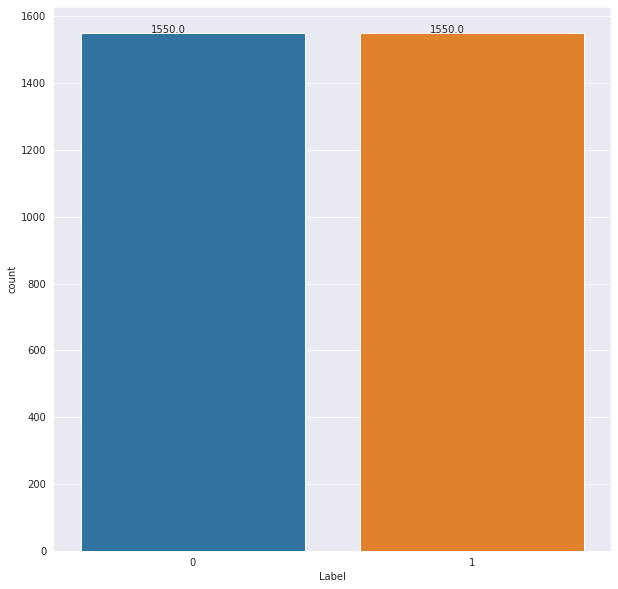

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data['Year'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
plot = sns.countplot(data['Label']);
for p in plot.patches:
   plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


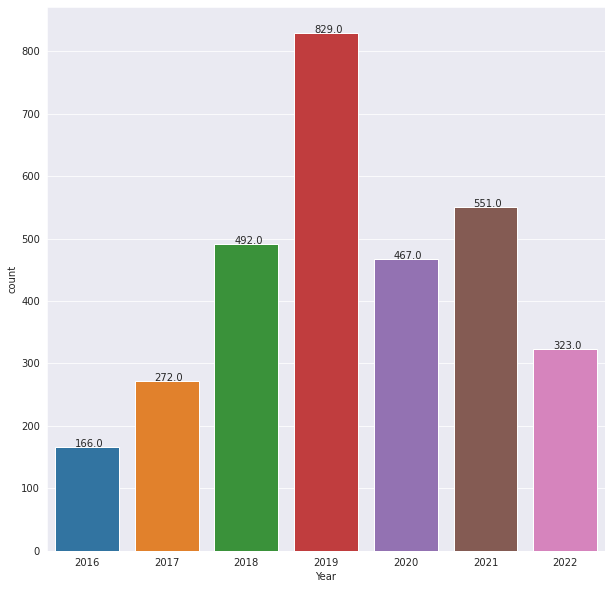

In [ ]:
 
import seaborn as sns
import matplotlib.pyplot as plt
data['Year'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
plot = sns.countplot(data['Year']);
for p in plot.patches:
   plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [ ]:
#clean data
#remove all the punctuations and numbers replacing it with space.
data['Content']=data['Content'].str.replace('[^a-zA-Z]',' ')
data['Content']=[word.lower() for word in data['Content']]
data.sample(6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Content,Year,Label
275,pahayag ni senador juan edgardo sonny angara...,2018,0
2397,para sa mga childhood dream ang pagiging astro...,2020,1
2760,ang pagkain ng malusog na mataas na kalidad na...,2021,1
1941,inaabisuhan ng department of public works and ...,2019,1
2423,isinalarawan ni senadora leila de lima na isan...,2020,1
28,naalala ko tuloy yung statement ni leni ambiso...,2016,0


In [ ]:
#remove stopwords
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/stopwords-iso/stopwords-tl/master/stopwords-tl.json") as url:
    stopwords = json.loads(url.read().decode())
    print(stopwords)



['akin', 'aking', 'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'dahil', 'dalawa', 'dapat', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag', 'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan', 'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang', 'kanino', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang', 'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari', 'maaaring', 'maging', 'mahusay', 'makita', 'marami', 'marapat', 'masyado', 'may', 'mayroon', 'mga', 'minsan', 'mismo', 'mula', 'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'napaka', 'narito', 'nasaan', 'ng', 'ngayon', 'ni', 'nila',

In [ ]:
data['content2'] =data['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
data[['Content','content2']].head()

,Content,content2
0,roxas planong kasuhan si president duterte dah...,roxas planong kasuhan si president duterte nap...
1,dalawang bundok at kalahati sa zambales ipinag...,dalawang bundok kalahati zambales ipinagbili c...
2,libreng pabahay para sa mga mahihirap ipapatup...,libreng pabahay mahihirap ipapatupad po dutert...
3,narinig nyo na ba ang usap usapang may militar...,narinig nyo ba usap usapang military tunnel da...
4,grabe talaga ang pag hanga ng korean reporter ...,grabe talaga pag hanga korean reporter to kay ...


In [ ]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import WhitespaceTokenizer
data['tokenize']=data['content2'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) 
data['tokenize'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [roxas, planong, kasuhan, si, president, duter...
1    [dalawang, bundok, kalahati, zambales, ipinagb...
2    [libreng, pabahay, mahihirap, ipapatupad, po, ...
3    [narinig, nyo, ba, usap, usapang, military, tu...
4    [grabe, talaga, pag, hanga, korean, reporter, ...
Name: tokenize, dtype: object

In [ ]:
#lemmatization
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
def lema_words(text):
  wnl=WordNetLemmatizer()
  return[wnl.lemmatize(w) for w in text]

data['lematize']=data['tokenize'].apply(lema_words)  
data[['tokenize','lematize']].sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,tokenize,lematize
2298,"[nag, alok, pamahalaan, p, milyon, pabuya, ika...","[nag, alok, pamahalaan, p, milyon, pabuya, ika..."
310,"[inutos, pamahalaan, mahigpit, pagpapatupad, n...","[inutos, pamahalaan, mahigpit, pagpapatupad, n..."
155,"[wowl, good, news, po, supporters, pres, duter...","[wowl, good, news, po, supporter, pres, dutert..."
260,"[nag, babala, gagawa, radikal, pagbabago, dara...","[nag, babala, gagawa, radikal, pagbabago, dara..."
1813,"[lingayen, pangasinan, umanong, miyembro, gun,...","[lingayen, pangasinan, umanong, miyembro, gun,..."


In [ ]:
data['lematized_words']=0
for i in range(0,len(data)):
  data['lematized_words'][i] = ' '.join(data['lematize'][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer(max_features=1000)
vect=cv.fit_transform(data.lematized_words).toarray()
vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tfidf_transformer=TfidfTransformer(use_idf=True)
tfidf_array=tfidf_transformer.fit_transform(vect).toarray()
tfidf_array


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

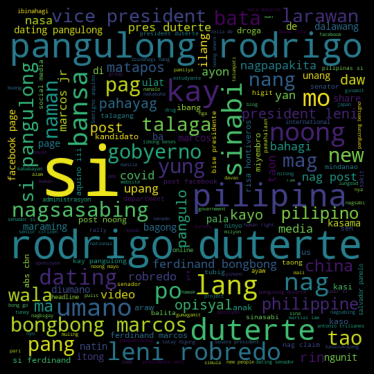

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
fake_cloud=''.join(data[data.Label==0]['content2'])
fake_cloud=WordCloud(width=520, height=520).generate(fake_cloud)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#initialize testing
data_x=tfidf_array
data_y=data['Label']

#splitting data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_array,data_y,test_size=0.2,random_state=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier


In [ ]:
#Random Forest
rfc=RandomForestClassifier(random_state=0)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
accuracy= round((accuracy_score(ytest,ypred)*100),2)
print("Accuracy of Random Forest is {}".format(accuracy))


Accuracy of Random Forest is 89.19


In [ ]:
print("Accuracy is {}".format(accuracy))
print("confusion_matrix:")
LABEL=['0','1']
conf=confusion_matrix(ytest,ypred)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(ytest, ypred),
                                show_absolute=True,
                                show_normed=True, 
                                colorbar=True)
plt.show()
print("\nClassification Report of Random Forest Classifier:\n")
print(classification_report(ytest, ypred))

Accuracy is 89.19
confusion_matrix:


TypeError: ignored

Accuracy of SVM is 90.65
confusion_matrix:


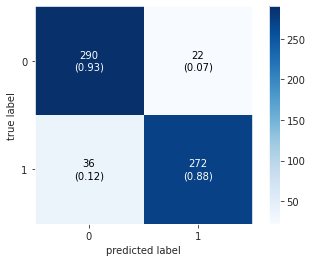


Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       312
           1       0.93      0.88      0.90       308

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620



In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf', probability=True)
svm.fit(xtrain,ytrain)
y_pred_svm=svm.predict(xtest)
accuracy_svm=round((accuracy_score(ytest,y_pred_svm)*100),2)        
print("Accuracy of SVM is {}".format(accuracy_svm))

#confusion matrix
print("confusion_matrix:")
LABEL=['0','1']
import matplotlib.pyplot as plt
import seaborn as sns
conf_lr=confusion_matrix(ytest,y_pred_svm)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(ytest, y_pred_svm),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(ytest, y_pred_svm))

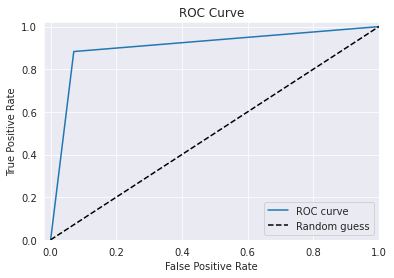

In [ ]:
y_pred_prob_svm = svm.predict_proba(xtest)[:,1]
%matplotlib inline

fpr, tpr, thresholds = roc_curve(ytest, y_pred_svm)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

Accuracy of SVM is 87.42
Accuracy is 87.42
confusion_matrix:


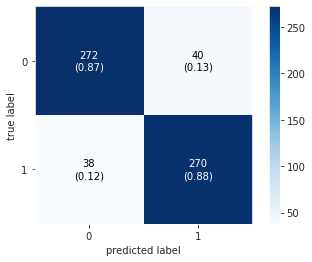


Classification Report of Passive-Aggressive Classifier:

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       312
           1       0.87      0.88      0.87       308

    accuracy                           0.87       620
   macro avg       0.87      0.87      0.87       620
weighted avg       0.87      0.87      0.87       620



In [ ]:
#Passive-Aggressive Classifier
clf = PassiveAggressiveClassifier()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
accuracy= round((accuracy_score(ytest,ypred)*100),2)
print("Accuracy of SVM is {}".format(accuracy))


print("Accuracy is {}".format(accuracy))
print("confusion_matrix:")
LABEL=['0','1']
conf=confusion_matrix(ytest,ypred)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(ytest, ypred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print("\nClassification Report of Passive-Aggressive Classifier:\n")
print(classification_report(ytest, ypred))

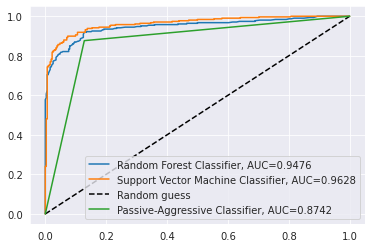

In [ ]:
from sklearn import metrics
#set up plotting area
plt.figure(0).clf()

#fit rfc model and plot ROC curve
y_pred = rfc.predict_proba(xtest)[:, 1]
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred)
auc = round(metrics.roc_auc_score(ytest, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred = svm.predict_proba(xtest)[:, 1]
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred)
auc = round(metrics.roc_auc_score(ytest, y_pred), 4)
plt.plot(fpr,tpr,label="Support Vector Machine Classifier, AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')


#fit SVM model and plot ROC curve
y_pred = clf.predict(xtest)
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred)
auc = round(metrics.roc_auc_score(ytest, y_pred), 4)
plt.plot(fpr,tpr,label="Passive-Aggressive Classifier, AUC="+str(auc))

#add legend
plt.legend()

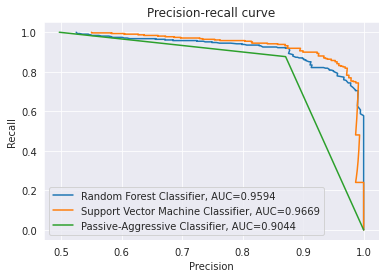

In [ ]:
from sklearn.metrics import auc,precision_recall_curve 
#set up plotting area
plt.figure(0).clf()

#fit rfc model
y_pred = rfc.predict_proba(xtest)[:, 1]
precision, recall, thresholds = precision_recall_curve(ytest, y_pred)
auc = round(metrics.auc(recall, precision), 4)
plt.plot(precision, recall,label="Random Forest Classifier, AUC="+str(auc))

#fit rfc model 
y_pred = svm.predict_proba(xtest)[:, 1]
precision, recall, thresholds = precision_recall_curve(ytest, y_pred)
auc = round(metrics.auc(recall, precision), 4)
plt.plot(precision, recall, label="Support Vector Machine Classifier, AUC="+str(auc))

y_pred = clf.predict(xtest)
precision, recall, thresholds = precision_recall_curve(ytest, y_pred)
auc = round(metrics.auc(recall, precision), 4)
plt.plot(precision, recall, label="Passive-Aggressive Classifier, AUC="+str(auc))

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")